## Import Necessary Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

## Load Dataset

In [7]:
wine_data = pd.read_csv('winequality-red.csv')

## General information about the dataset

In [9]:
wine_data = pd.read_csv('winequality-red.csv')

In [10]:
print(wine_data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [15]:
print(wine_data.shape)

(1599, 12)


In [17]:
print(wine_data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [19]:
missing_values = wine_data.isnull().sum()
print(missing_values)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [21]:
X = wine_data.drop(columns=['quality'])
y = wine_data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

dt_model = DecisionTreeClassifier(random_state=21)

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Model Accuracy: 0.61875

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.69      0.69      0.69       136
           6       0.63      0.63      0.63       128
           7       0.55      0.55      0.55        40
           8       0.17      0.33      0.22         3

    accuracy                           0.62       320
   macro avg       0.34      0.37      0.35       320
weighted avg       0.62      0.62      0.62       320



In [23]:
def quality_grouping(quality):
    if quality <= 4:
        return 'bad'
    elif quality <= 6:
        return 'average'
    else:
        return 'good'

In [25]:
wine_data['quality_group'] = wine_data['quality'].apply(quality_grouping)

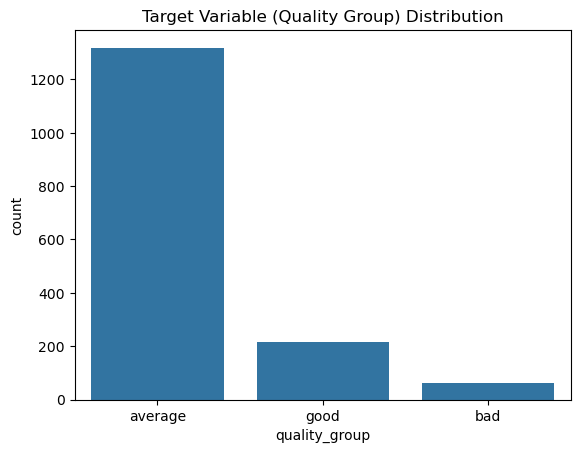

In [27]:
sns.countplot(data=wine_data, x='quality_group')
plt.title("Target Variable (Quality Group) Distribution")
plt.show()

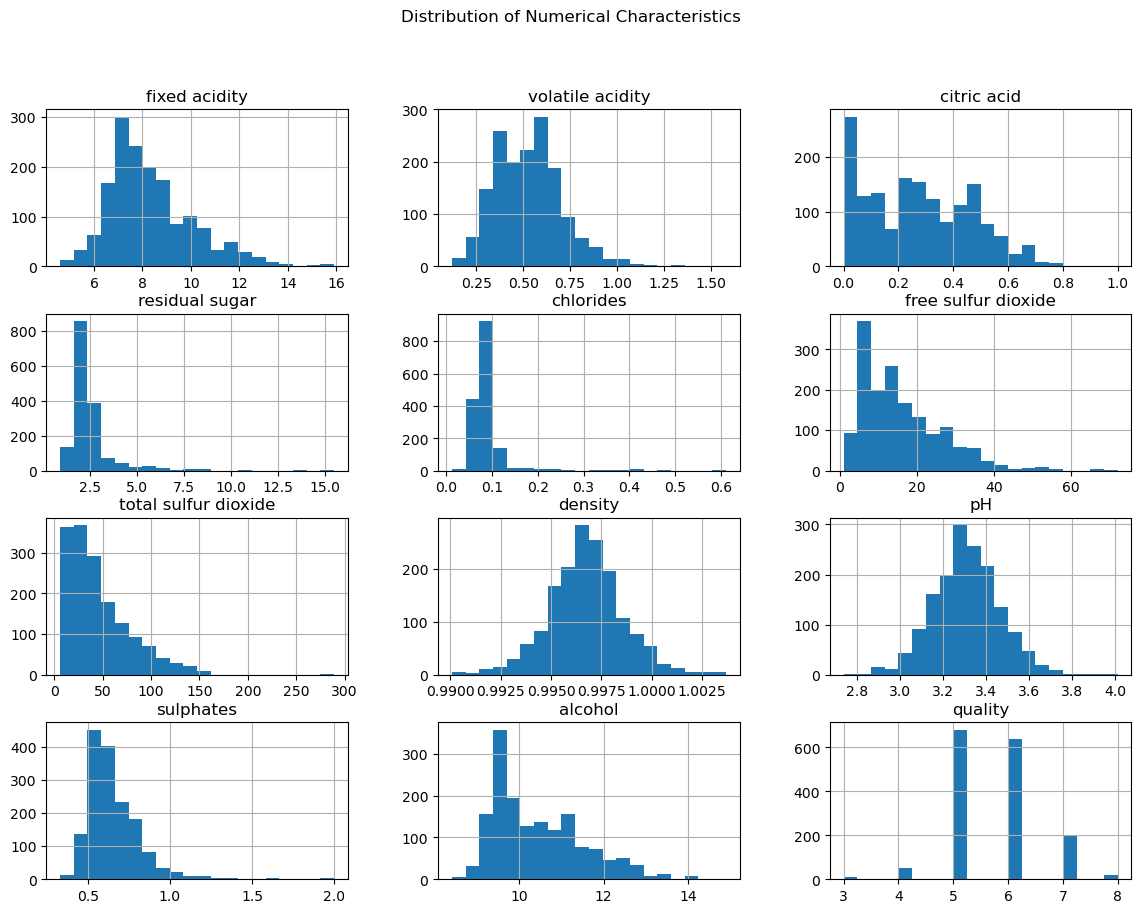

In [29]:
wine_data.hist(bins=20, figsize=(14, 10))
plt.suptitle("Distribution of Numerical Characteristics")
plt.show()

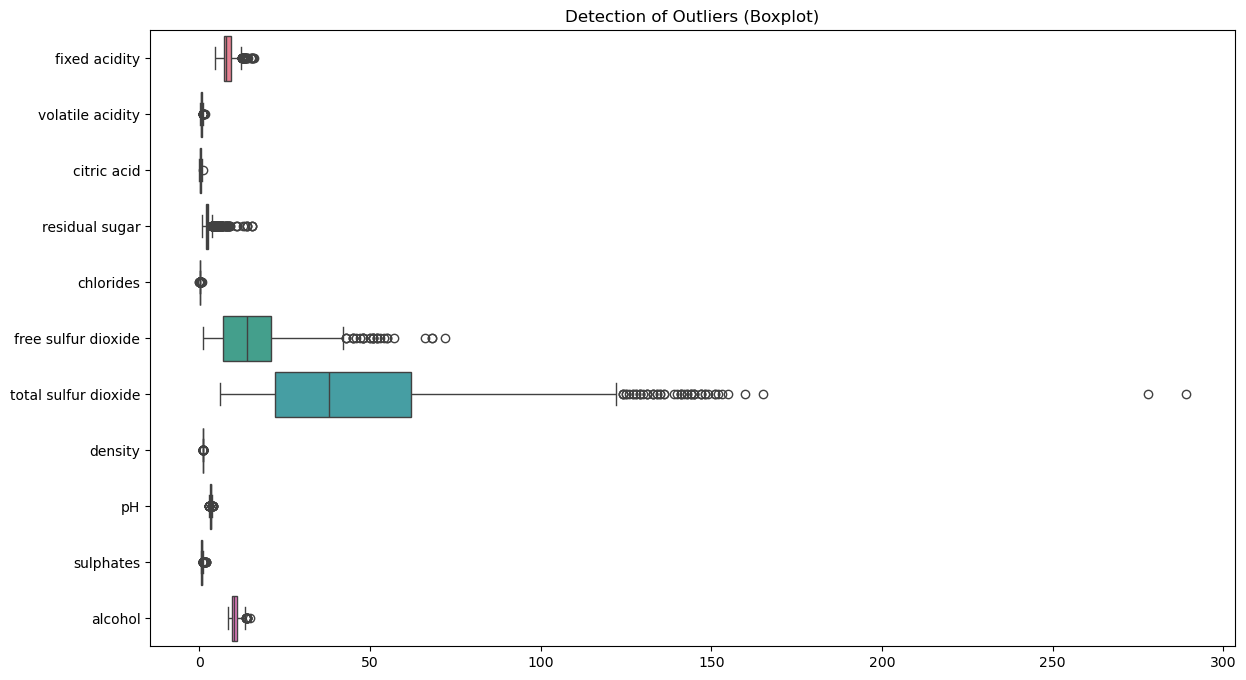

In [30]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=wine_data.drop(columns=['quality', 'quality_group']), orient='h')
plt.title("Detection of Outliers (Boxplot)")
plt.show()

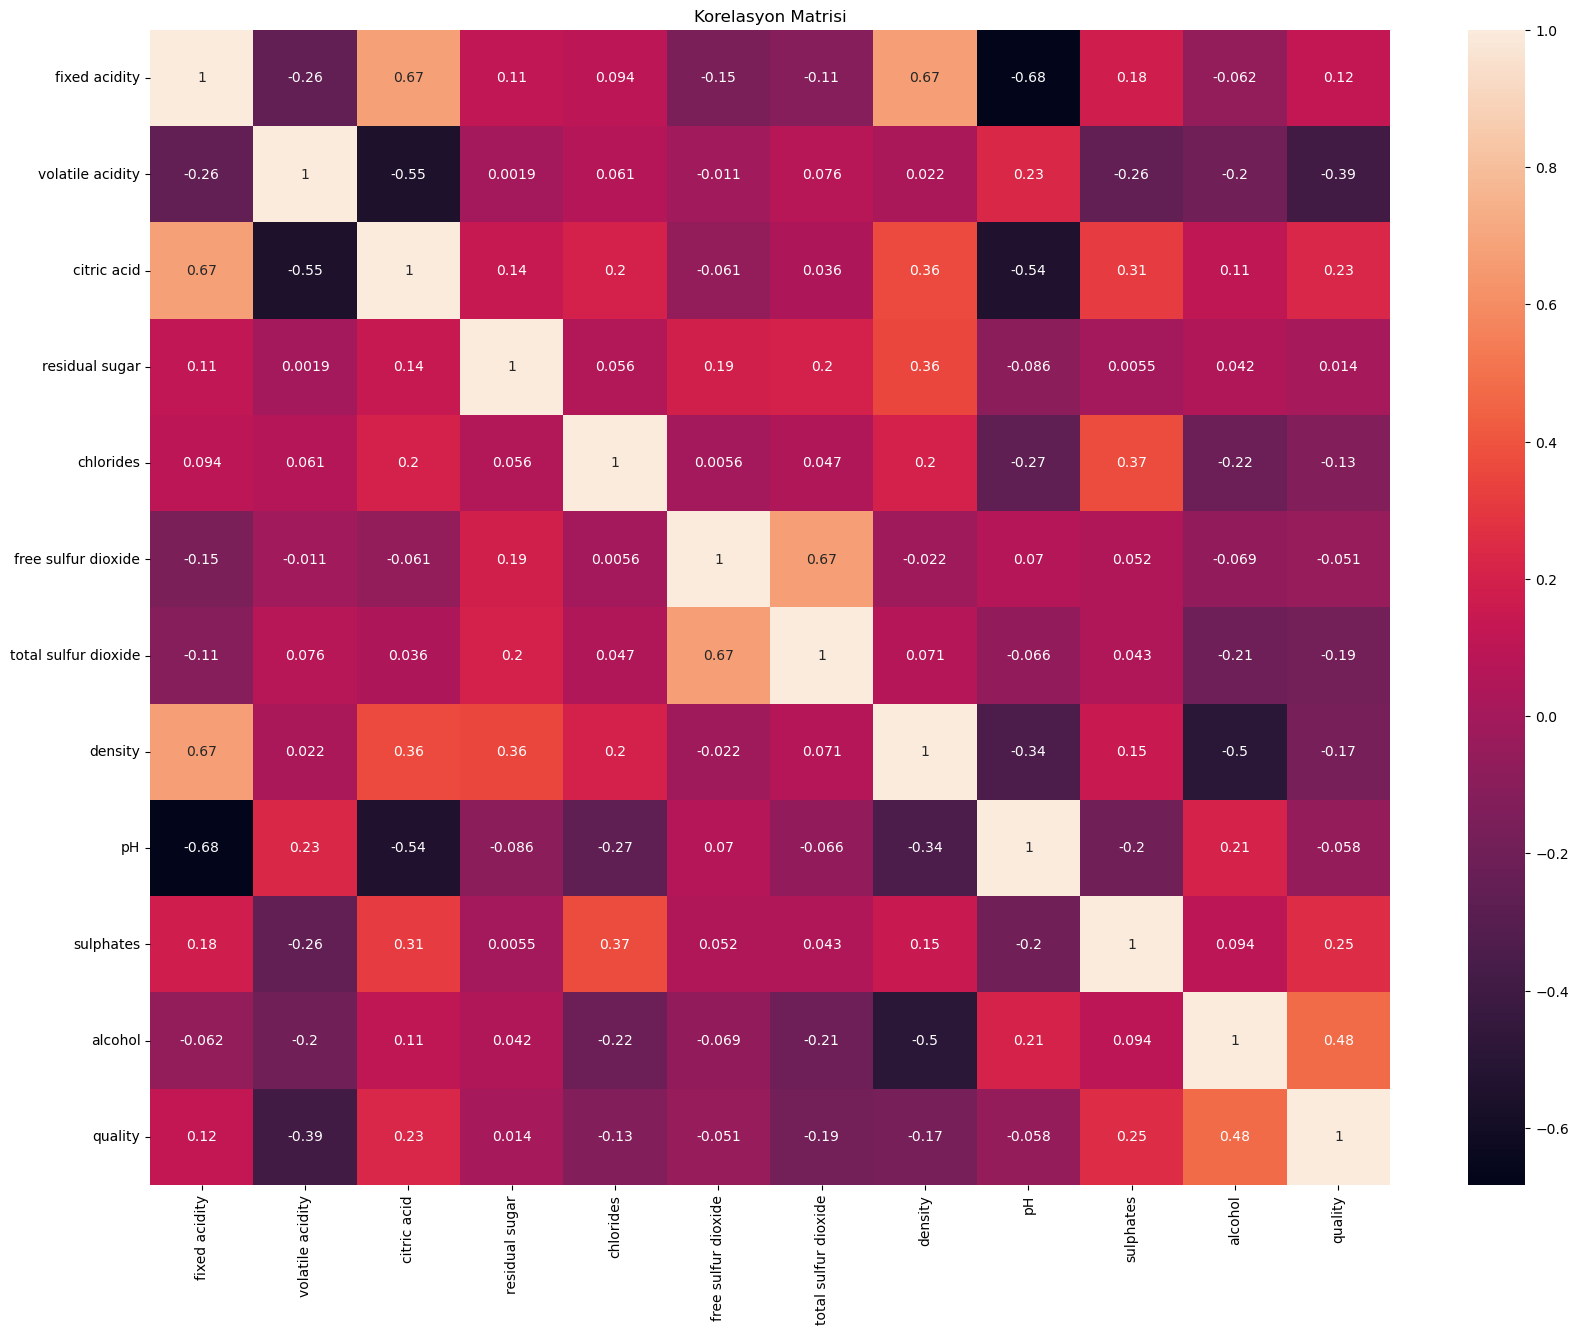

In [33]:
# We must select numeric columns by removing the 'quality_group' column
numeric_data = wine_data.drop(columns=['quality_group'])

corr_matrix = numeric_data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True)
plt.title("Korelasyon Matrisi")
plt.show()

In [35]:
cor_target = abs(corr_matrix["quality"])
relevant_features = cor_target[cor_target>0.1]
print("Those with strong relationships:")
print(relevant_features)

Those with strong relationships:
fixed acidity           0.124052
volatile acidity        0.390558
citric acid             0.226373
chlorides               0.128907
total sulfur dioxide    0.185100
density                 0.174919
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64


In [37]:
to_drop = cor_target[cor_target < 0.1].index
print("Features to be removed, threshold 0.1")
print(to_drop)

Features to be removed, threshold 0.1
Index(['residual sugar', 'free sulfur dioxide', 'pH'], dtype='object')


In [39]:
X = wine_data.drop(columns=['quality', 'quality_group'])
y = wine_data['quality_group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

dt_model = DecisionTreeClassifier(random_state=21, class_weight='balanced')

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Model Accuracy: 0.83125

Classification Report:
               precision    recall  f1-score   support

     average       0.89      0.91      0.90       264
         bad       0.14      0.08      0.10        13
        good       0.57      0.58      0.57        43

    accuracy                           0.83       320
   macro avg       0.53      0.52      0.53       320
weighted avg       0.82      0.83      0.82       320



[[240   5  19]
 [ 12   1   0]
 [ 17   1  25]]


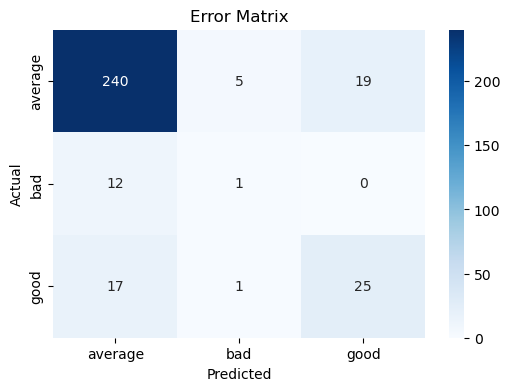

In [41]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['average', 'bad', 'good'], yticklabels=['average', 'bad', 'good'])
plt.title('Error Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [43]:
filtered_data = wine_data.drop(columns=to_drop)

print(f"Extracted Features: {list(to_drop)}")
print(f"New Data Set Sizes: {filtered_data.shape}")
print(filtered_data.info())


Extracted Features: ['residual sugar', 'free sulfur dioxide', 'pH']
New Data Set Sizes: (1599, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   chlorides             1599 non-null   float64
 4   total sulfur dioxide  1599 non-null   float64
 5   density               1599 non-null   float64
 6   sulphates             1599 non-null   float64
 7   alcohol               1599 non-null   float64
 8   quality               1599 non-null   int64  
 9   quality_group         1599 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 125.1+ KB
None


In [45]:
X = filtered_data.drop(columns=['quality', 'quality_group'])
y = filtered_data['quality_group']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [49]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

In [51]:
smote = SMOTE(random_state=21)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
print(X_train_resampled)

[[ 0.15681567 -0.86821608  1.94009371 ...  0.75957296 -0.46752912
   0.54663988]
 [-0.86997907  0.34382322 -1.09074041 ... -0.28600853 -0.41063381
   0.35761591]
 [-0.01431679  1.03248191 -0.62840978 ...  0.03244268  0.61348184
  -0.87103989]
 ...
 [ 1.52168003 -1.11334135  1.25624968 ... -0.54456808  0.9277072
   0.4746752 ]
 [ 3.82539467  0.43626472  2.48429069 ...  3.01948918  0.20545918
   0.65885558]
 [ 0.13894039 -0.9611377   0.69855417 ... -0.70101552  0.88218966
   0.84952659]]


In [53]:
print("Original Trainer Size:", X_train.shape, y_train.shape)
print("SMOTE Post Trainer Size:", X_train_resampled.shape, y_train_resampled.shape)

Original Trainer Size: (1279, 8) (1279,)
SMOTE Post Trainer Size: (3165, 8) (3165,)


In [55]:
dt_model = DecisionTreeClassifier(random_state=21, class_weight='balanced')

dt_model.fit(X_train_resampled, y_train_resampled)

y_pred = dt_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Model Accuracy: 0.809375

Classification Report:
               precision    recall  f1-score   support

     average       0.91      0.85      0.88       264
         bad       0.21      0.38      0.27        13
        good       0.59      0.67      0.63        43

    accuracy                           0.81       320
   macro avg       0.57      0.64      0.59       320
weighted avg       0.84      0.81      0.82       320



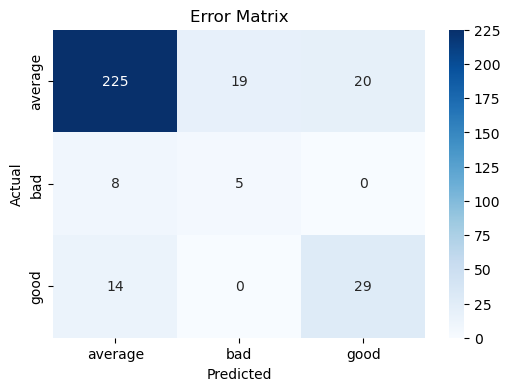

In [57]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['average', 'bad', 'good'], yticklabels=['average', 'bad', 'good'])
plt.title('Error Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [59]:
params = {
    "criterion": ['gini', 'entropy'],
    "max_depth": np.arange(3, 20),
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [2, 4],
    "max_features": [0.5, 0.75, 1]
}

for cv in range(3, 10): 
    cv_grid = GridSearchCV(estimator=dt_model, param_grid=params, cv=cv, scoring='accuracy', n_jobs=-1)
    cv_grid.fit(X_train_resampled, y_train_resampled)
    
    print("%d fold score: %3.2f" % (cv, cv_grid.score(X_test, y_test)))
    print("Best parameters: ", cv_grid.best_params_)

C:\Users\Omer\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


3 fold score: 0.76
Best parameters:  {'criterion': 'entropy', 'max_depth': 12, 'max_features': 0.5, 'min_samples_leaf': 2, 'min_samples_split': 5}


C:\Users\Omer\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


4 fold score: 0.82
Best parameters:  {'criterion': 'entropy', 'max_depth': 13, 'max_features': 0.5, 'min_samples_leaf': 2, 'min_samples_split': 5}


C:\Users\Omer\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


5 fold score: 0.82
Best parameters:  {'criterion': 'entropy', 'max_depth': 12, 'max_features': 0.75, 'min_samples_leaf': 2, 'min_samples_split': 5}


C:\Users\Omer\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


6 fold score: 0.13
Best parameters:  {'criterion': 'entropy', 'max_depth': 12, 'max_features': 0.5, 'min_samples_leaf': 2, 'min_samples_split': 2}


C:\Users\Omer\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


7 fold score: 0.82
Best parameters:  {'criterion': 'entropy', 'max_depth': 13, 'max_features': 0.5, 'min_samples_leaf': 2, 'min_samples_split': 5}


C:\Users\Omer\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


8 fold score: 0.82
Best parameters:  {'criterion': 'entropy', 'max_depth': 18, 'max_features': 0.75, 'min_samples_leaf': 2, 'min_samples_split': 2}
9 fold score: 0.82
Best parameters:  {'criterion': 'entropy', 'max_depth': 19, 'max_features': 0.75, 'min_samples_leaf': 2, 'min_samples_split': 5}


C:\Users\Omer\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [61]:
best_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=13,
    max_features=0.5,
    min_samples_leaf=2,
    min_samples_split=2,
    class_weight="balanced",
    random_state=21
)

best_model.fit(X_train_resampled, y_train_resampled)

y_pred = best_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8125

Classification Report:
               precision    recall  f1-score   support

     average       0.92      0.85      0.88       264
         bad       0.28      0.38      0.32        13
        good       0.53      0.72      0.61        43

    accuracy                           0.81       320
   macro avg       0.58      0.65      0.61       320
weighted avg       0.84      0.81      0.82       320



[[224  13  27]
 [  8   5   0]
 [ 12   0  31]]


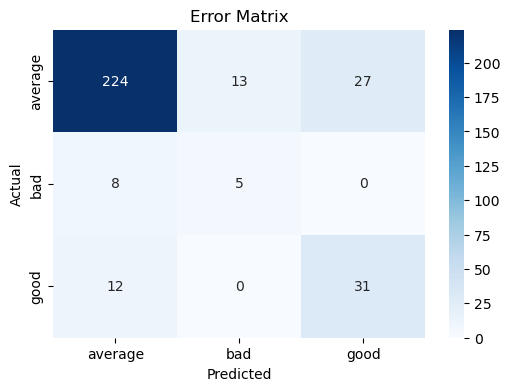

In [63]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['average', 'bad', 'good'], yticklabels=['average', 'bad', 'good'])
plt.title('Error Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [65]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=16,
    max_features=0.75,
    random_state=21
)
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.840625

Classification Report:
               precision    recall  f1-score   support

     average       0.92      0.88      0.90       264
         bad       0.31      0.31      0.31        13
        good       0.59      0.77      0.67        43

    accuracy                           0.84       320
   macro avg       0.61      0.65      0.63       320
weighted avg       0.85      0.84      0.85       320



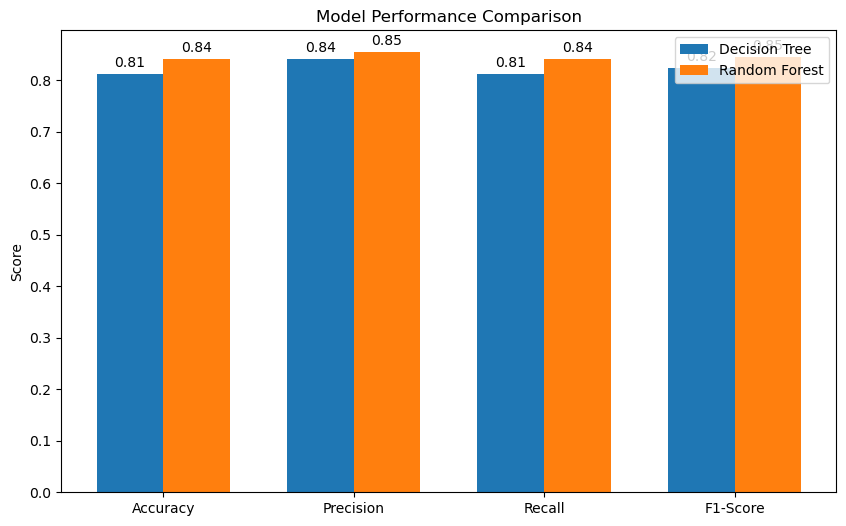

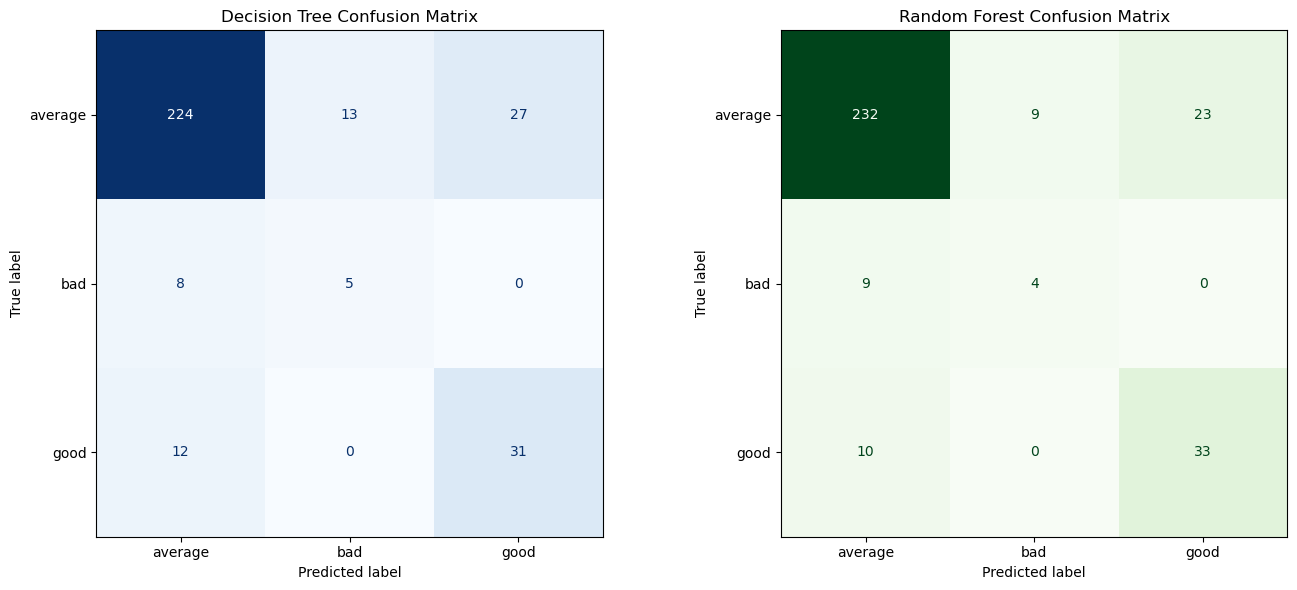

In [93]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def calculate_metrics(model_name, y_test, y_pred):
    from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

    metrics = {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1-Score": f1_score(y_test, y_pred, average="weighted")
    }
    return metrics

dt_metrics = calculate_metrics("Decision Tree", y_test, y_pred)
rf_metrics = calculate_metrics("Random Forest", y_test, y_pred_rf)

metrics_df = [dt_metrics, rf_metrics]

labels = ["Accuracy", "Precision", "Recall", "F1-Score"]
dt_values = [dt_metrics[label] for label in labels]
rf_values = [rf_metrics[label] for label in labels]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, dt_values, width, label="Decision Tree")
bars2 = ax.bar(x + width/2, rf_values, width, label="Random Forest")


ax.set_ylabel("Score")
ax.set_title("Model Performance Comparison")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Barların üzerine değerleri ekle
for bars in [bars1, bars2]:
    ax.bar_label(bars, fmt='%.2f', padding=3)

plt.show()

# Confusion Matrix görselleştirme
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Decision Tree Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
ConfusionMatrixDisplay(cm_dt, display_labels=np.unique(y_test)).plot(ax=axes[0], cmap="Blues", colorbar=False)
axes[0].set_title("Decision Tree Confusion Matrix")

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=np.unique(y_test))
ConfusionMatrixDisplay(cm_rf, display_labels=np.unique(y_test)).plot(ax=axes[1], cmap="Greens", colorbar=False)
axes[1].set_title("Random Forest Confusion Matrix")

plt.tight_layout()
plt.show()
